In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Friendzone Clean Dataset.csv')

In [3]:
df = df.drop(df.columns[[0]], axis=1)

In [4]:
df.head()

,city,reason,gender
0,15,1,0
1,13,0,1
2,13,7,0
3,0,7,0
4,15,6,1


In [5]:
X=df[['city','reason','gender']]

In [6]:
X=X.values.reshape(-1,1)

<Axes: >

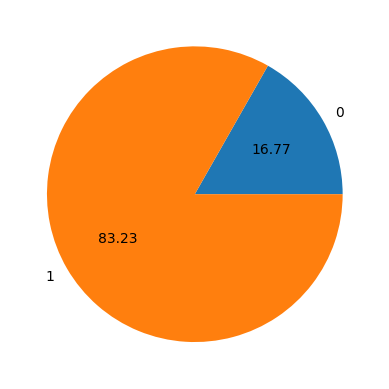

In [7]:
df.groupby('gender').size().plot(kind='pie', autopct='%.2f')

<Axes: >

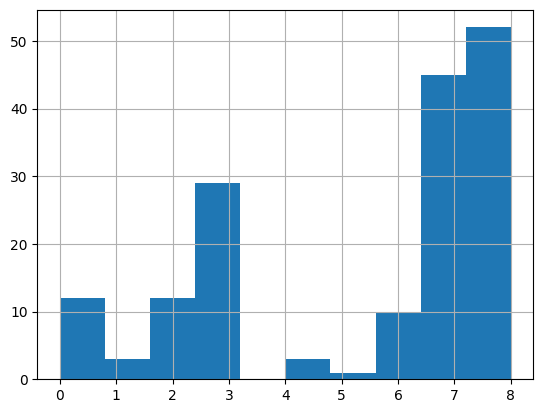

In [8]:
df['reason'].hist()

# K-means Clustering

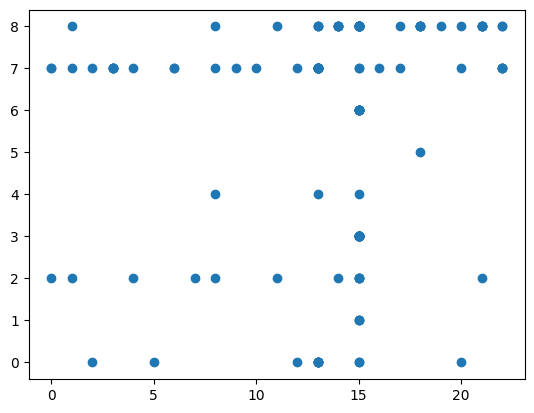

In [9]:
plt.scatter(df['city'],df['reason'])

In [10]:
from sklearn.cluster import KMeans


In [11]:
model= KMeans(n_clusters=9)


In [12]:
model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [13]:
p=[[1]]


In [14]:
model.predict(p)

array([1], dtype=int32)

In [15]:
centroids=model.cluster_centers_

In [16]:
centroids

array([[ 1.49404762e+01],
       [ 1.08805031e+00],
       [ 6.73333333e+00],
       [ 1.78888889e+01],
       [ 3.12820513e+00],
       [ 1.28235294e+01],
       [-8.88178420e-16],
       [ 8.05172414e+00],
       [ 2.12000000e+01]])

In [17]:
# plt.scatter(df[['city']],df['reason'],c=model.labels_)
# plt.scatter(centroids[:,0],centroids[:,1],c='red',s=100)

In [18]:
x=df[['city','reason']]
y=df['gender']

In [19]:
x

,city,reason
0,15,1
1,13,0
2,13,7
3,0,7
4,15,6
...,...,...
162,15,8
163,15,4
164,15,8
165,14,8


In [20]:
y

0      0
1      1
2      0
3      0
4      1
      ..
162    1
163    0
164    0
165    1
166    1
Name: gender, Length: 167, dtype: int64

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='entropy')
#entropy results in higher acc than gini
model=decisiontree.fit(xtrain,ytrain)

In [24]:
ypred=model.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model accuracy score : 0.8529


In [27]:
df.columns

Index(['city', 'reason', 'gender'], dtype='object')

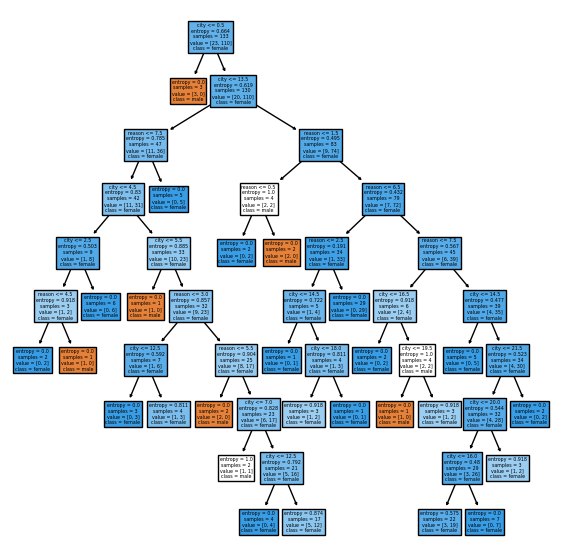

In [28]:
from sklearn import tree
import matplotlib.image as pltimage
fig = plt.figure(figsize=(7,7))
tree.plot_tree(decisiontree, feature_names=['city', 'reason', 'gender'],class_names=['male','female'],filled=True)
fig.savefig('tree.png')

In [29]:
rules:str = tree.export_text(model)

In [30]:
rules

'|--- feature_0 <= 0.50\n|   |--- class: 0\n|--- feature_0 >  0.50\n|   |--- feature_0 <= 13.50\n|   |   |--- feature_1 <= 7.50\n|   |   |   |--- feature_0 <= 4.50\n|   |   |   |   |--- feature_0 <= 2.50\n|   |   |   |   |   |--- feature_1 <= 4.50\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_1 >  4.50\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  2.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_0 >  4.50\n|   |   |   |   |--- feature_0 <= 5.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  5.50\n|   |   |   |   |   |--- feature_1 <= 3.00\n|   |   |   |   |   |   |--- feature_0 <= 12.50\n|   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |--- feature_0 >  12.50\n|   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_1 >  3.00\n|   |   |   |   |   |   |--- feature_1 <= 5.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- feature_1 >

In [31]:
with open('friend zone tree.txt','w')  as f:
    f.write(rules)

# Random Forest

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [35]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[ 1,  8],
       [ 0, 33]])

In [37]:
accuracy_score(y_test, y_pred)


0.8095238095238095

# Logistic Regression

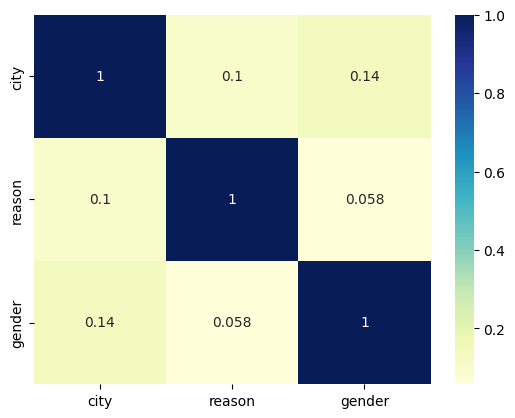

In [38]:
import seaborn as sns
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# Initializing with 'solver' parameter
logmodel = LogisticRegression()
# Training the model
logmodel.fit(xtrain,ytrain)

LogisticRegression()

In [41]:
predictions = logmodel.predict(xtest)


In [42]:
from sklearn.metrics import classification_report


In [43]:
print(classification_report(ytest,predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        29

    accuracy                           0.85        34
   macro avg       0.43      0.50      0.46        34
weighted avg       0.73      0.85      0.79        34



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
p=knn.predict(xtest)
acc=accuracy_score(ytest,p)
acc

0.8529411764705882

In [46]:
bestK = -1
bestScore = -1
for x in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(xtrain,ytrain)
    p=knn.predict(xtest)

#     p=pd.DataFrame(p)
#     p[0] = p[0].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
    print('*********predicted data*********')
    print(p)
    print('*********real data*********')
    print(ytest)
    accuracy = accuracy_score(p, ytest)
    print(f'Accuracy score for {x} is ',accuracy)
    if(accuracy > bestScore):
        bestScore = accuracy
        bestK = x

print('BestK  : ', bestK)
print('BestScore  : ', bestScore)

*********predicted data*********
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0]
*********real data*********
31     1
65     1
125    1
163    0
108    1
68     1
64     1
140    1
62     1
161    1
18     1
12     1
79     1
87     1
17     1
85     1
148    1
93     1
137    1
132    1
40     0
35     1
156    1
76     1
11     1
124    0
28     1
77     1
116    0
89     1
141    1
32     0
81     1
23     1
Name: gender, dtype: int64
Accuracy score for 1 is  0.8529411764705882
*********predicted data*********
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0]
*********real data*********
31     1
65     1
125    1
163    0
108    1
68     1
64     1
140    1
62     1
161    1
18     1
12     1
79     1
87     1
17     1
85     1
148    1
93     1
137    1
132    1
40     0
35     1
156    1
76     1
11     1
124    0
28     1
77     1
116    0
89     1
141    1
32     0
81     1
23     1
Name: gender, dtype: int64
Accuracy score for 3 is  0.7

# SVM


In [47]:
from sklearn import svm
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)

In [48]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.848
poly
0.848
rbf
0.848
sigmoid
0.792


In [49]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8095238095238095


In [50]:
model = svm.SVC(kernel='sigmoid')
model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [51]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8095238095238095
